# Example scan

Perform a parameter scan for a given input file and plot the results.

## Scan details

The input file is a scan-enabled version of the large tokamak `IN.DAT`, as found in the `tests` directory. The scan-relevant values are:
```
nsweep = 17 * b_tf_inboard_max, maximum peak toroidal field (T) (`constraint equation 25`)
isweep = 6
sweep = 11., 11.2, 11.4, 11.6, 11.8, 12.
```

- `nsweep`: integer denoting the variable to scan (see `scan_module` for options). Here `17` corresponds to `b_tf_inboard_max` being scanned
- `isweep`: the number of scan points to run
- `sweep`: array of values for the scanned variable to take; one for each run. Should be of length `isweep`

In [1]:
from pathlib import Path

from process.main import SingleRun

data_dir = Path("data")
input_name = data_dir / "scan_example_file_IN.DAT"
# Perform a SingleRun on a scan-enabled input file
single_run = SingleRun(str(input_name), solver="vmcon_bounded")
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-537-g6e33f88e
 Git Branch : main
 Date : 14/08/2025 UTC
 Time : 15:49
 User : ubuntu
 Computer : nunn04
 Directory : /home/ubuntu/PROCESS/examples
 Input : /home/ubuntu/PROCESS/examples/data/scan_example_file_IN.DAT
 Run title : Generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 ***********************************************************************************************************

/home/ubuntu/PROCESS/process/init.py:93: UserWarning: Lower limit of volume averaged electron temperature (te) has been raised to ensure te > temp_plasma_pedestal_kev
  check_process(inputs)
/home/ubuntu/PROCESS/process/init.py:93: UserWarning: temp_cs_superconductor_margin_min and tmargmin should not both be specified in IN.DAT temp_cs_superconductor_margin_min has been ignored
  check_process(inputs)
/home/ubuntu/PROCESS/process/iteration_variables.py:452: UserWarning: String 'fp_plant_electric_net_required_mw' of length 33 is being set on a Fortran variable with length 32. The string will be truncated!
  fortran.numerics.name_xc[i] = string_to_f2py_compatible(
/home/ubuntu/PROCESS/process/physics.py:7277: RuntimeWarning: divide by zero encountered in divide
  * (nd_plasma_pedestal_electron / n_greenwald) ** -0.174
process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
/home/ubuntu/

8 | Convergence Parameter: 1.567E-20
 
 ************************************* PROCESS found a feasible solution **************************************
 
 Warning in routine OCMMNT :
Certain operating limits have been reached,
 as shown by the following optimisation parameters that are
 at or near to the edge of their prescribed range :

This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost P

## Plot scan results
Use `plot_scans.py` to plot the resulting `MFILE.DAT`.

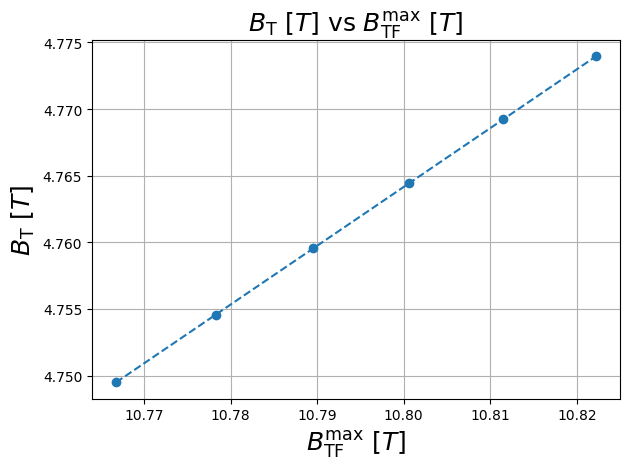

<Figure size 640x480 with 0 Axes>

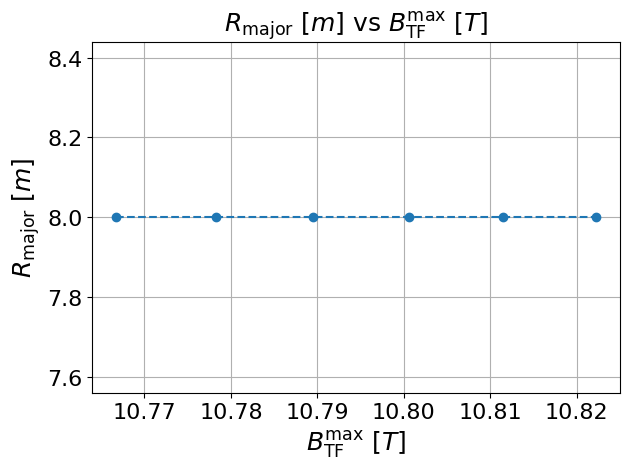

<Figure size 640x480 with 0 Axes>

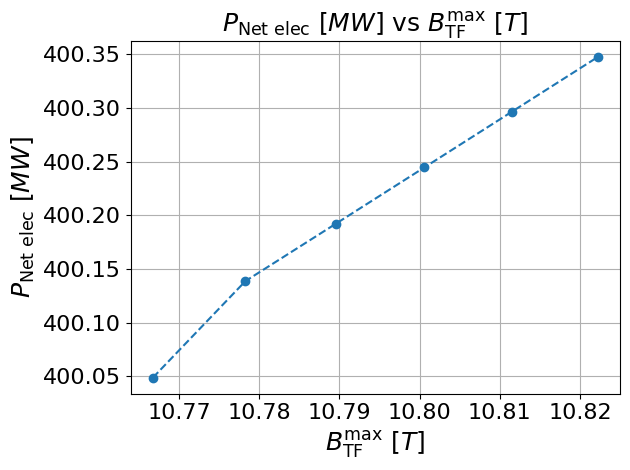

<Figure size 640x480 with 0 Axes>

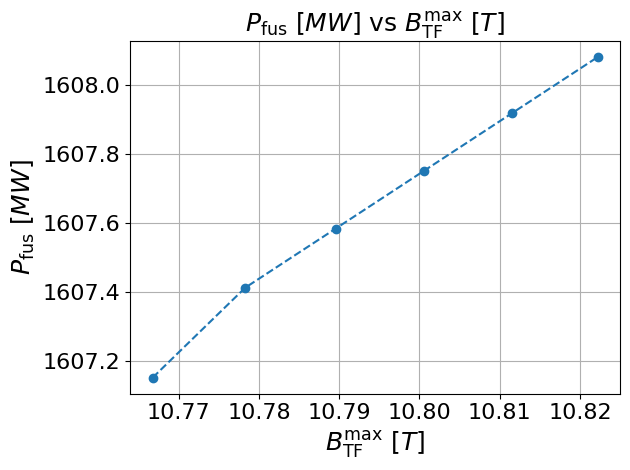

<Figure size 640x480 with 0 Axes>

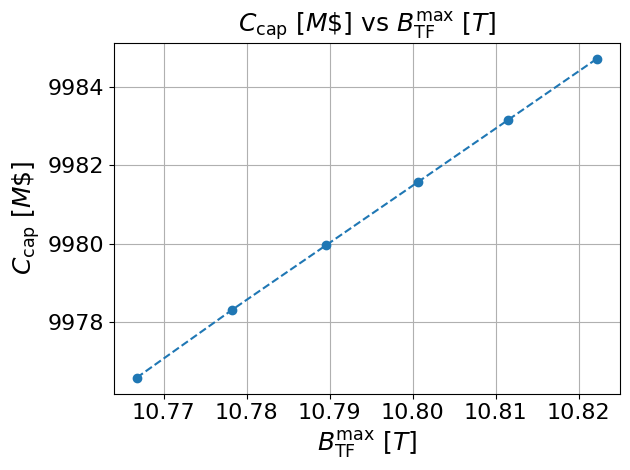

<Figure size 640x480 with 0 Axes>

In [2]:
%matplotlib inline
from process.io import plot_scans

# Define working directory relative to project dir and input file name
mfile_name = data_dir / "scan_example_file_MFILE.DAT"
output_dir = data_dir

plot_scans.main(
    args=[
        "-f",
        str(mfile_name),
        "-yv",
        "bt rmajor p_plant_electric_net_mw p_fusion_total_mw capcost",
        "--outputdir",
        str(output_dir),
    ]
)